In [17]:
import torch
import torch.nn as nn
import torchvision
from torch.utils.data.sampler import SubsetRandomSampler
from torch.optim import lr_scheduler
from pathlib import Path
from matplotlib import pyplot as plt
import numpy as np
import torch.nn.functional as F
from torch.autograd import Variable
from sklearn.model_selection import train_test_split
# import torchsummary 
import matplotlib.pyplot as plt

In [18]:
train_on_gpu = torch.cuda.is_available()
if not train_on_gpu:
    print('CUDA is not available.  Training on CPU ...')
else:
    print('CUDA is available!  Training on GPU ...')

CUDA is available!  Training on GPU ...


In [19]:
# number of subprocesses to use for data loading
num_workers = 0
# how many samples per batch to load
batch_size_train = 64
batch_size_test = 1000
# learning rate
learning_rate = 0.01

In [20]:
train_loader = torch.utils.data.DataLoader(
    torchvision.datasets.MNIST('./data/', train=True, download=True,
                                transform=torchvision.transforms.Compose([
                                torchvision.transforms.ToTensor(),
                                torchvision.transforms.Normalize(
                                    (0.1307,), (0.3081,))
                                ])),
    batch_size=batch_size_train, shuffle=True)
test_loader = torch.utils.data.DataLoader(
    torchvision.datasets.MNIST('./data/', train=False, download=True,
                                transform=torchvision.transforms.Compose([
                                torchvision.transforms.ToTensor(),
                                torchvision.transforms.Normalize(
                                    (0.1307,), (0.3081,))
                                ])),
    batch_size=batch_size_test, shuffle=True)

In [21]:
print(train_loader)
print(test_loader)
examples = enumerate(test_loader)
print(examples)
batch_idx, (example_data, example_targets) = next(examples)
print(example_targets)

tensor([3, 5, 4, 8, 0, 9, 2, 5, 8, 6, 5, 6, 6, 8, 5, 1, 3, 9, 7, 1, 4, 2, 0, 9,
        3, 9, 8, 3, 6, 8, 8, 7, 8, 9, 3, 7, 2, 3, 7, 3, 8, 4, 7, 5, 2, 9, 1, 7,
        9, 6, 8, 2, 3, 9, 2, 8, 5, 0, 0, 4, 3, 0, 7, 9, 6, 2, 5, 7, 3, 8, 5, 3,
        4, 0, 5, 1, 9, 7, 9, 0, 8, 8, 6, 4, 2, 1, 7, 6, 0, 1, 2, 7, 1, 5, 0, 1,
        3, 9, 8, 9, 8, 5, 7, 2, 0, 4, 3, 0, 2, 2, 6, 2, 6, 5, 1, 9, 9, 7, 1, 9,
        1, 3, 4, 6, 2, 1, 9, 6, 7, 6, 0, 4, 9, 6, 3, 2, 7, 6, 6, 3, 1, 4, 0, 6,
        9, 2, 8, 7, 5, 0, 7, 6, 1, 5, 6, 8, 1, 9, 5, 2, 9, 8, 1, 0, 9, 3, 0, 3,
        7, 9, 7, 8, 6, 4, 7, 0, 1, 0, 2, 0, 6, 3, 0, 1, 4, 5, 8, 3, 0, 6, 9, 1,
        1, 4, 0, 1, 7, 1, 7, 6, 2, 3, 0, 2, 4, 0, 1, 7, 5, 2, 9, 0, 7, 2, 0, 1,
        7, 8, 6, 4, 1, 7, 7, 4, 0, 3, 9, 4, 6, 1, 0, 6, 0, 3, 4, 1, 0, 6, 9, 5,
        8, 4, 3, 3, 3, 8, 6, 0, 3, 6, 8, 5, 4, 1, 9, 1, 5, 2, 4, 2, 2, 3, 2, 8,
        9, 3, 9, 8, 4, 1, 8, 3, 6, 1, 5, 3, 6, 6, 1, 4, 7, 5, 5, 6, 6, 7, 1, 8,
        5, 8, 1, 2, 7, 7, 8, 2, 0, 1, 2,

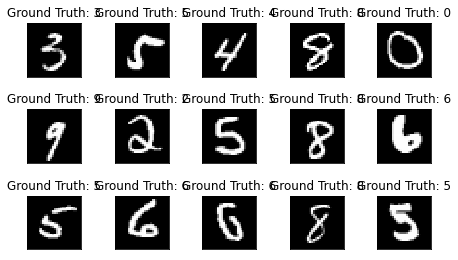

In [22]:
for i in range(15):
  plt.subplot(3,5,i+1)
  plt.tight_layout()
  plt.imshow(example_data[i][0], cmap='gray', interpolation='none')
  plt.title("Ground Truth: {}".format(example_targets[i]))
  plt.xticks([])
  plt.yticks([])
plt.show()

In [23]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 10, kernel_size=5)
        self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
        self.conv2_drop = nn.Dropout2d()
        self.fc1 = nn.Linear(320, 50)
        self.fc2 = nn.Linear(50, 10)
    def forward(self, x):
        x = F.relu(F.max_pool2d(self.conv1(x), 2))
        x = F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)), 2))
        x = x.view(-1, 320)
        x = F.relu(self.fc1(x))
        x = F.dropout(x, training=self.training)
        x = self.fc2(x)
        return F.log_softmax(x)

In [24]:
model = Net()
from torchsummary import summary
print(model)

TypeError: summary() missing 1 required positional argument: 'input_size'